In [182]:
%matplotlib inline
import numpy as np
import numpy.random as nprnd
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
import json

In [183]:
#Takes in the json file and assigns it the name 'data'
with open('template.json') as f:
  data = json.load(f)

# Raw Data Display

In [184]:
#Creates a list of all 'n' values
nvals1 = []
nvals = []
for i in data['Info']['n']:
    nvals1.append(i)
    nvals.append(i)

#Makes it a list of integers not of strings
for i in range(0, len(nvals1)):
    nvals[i] = int(nvals1[i])
    
#Takes the Quartiles to graph
quart = nvals[int(np.floor(len(nvals)/4))]
half = nvals[int(np.floor(len(nvals)/2))]
tquar = nvals[int(np.floor(3*len(nvals)/4))]
maxi = nvals[len(nvals)-1]

In [185]:
#Defines a function to get theta values for a given n
def getTheta(n):
    theta = []
    for k in range(0,n):
        theta.append((2*np.pi*k)/n)
    return theta

In [186]:
#Gets Data for the quartiles
#If you want to try a different data set for graphing, alter the number in the last box#
q1 = data['Info']['n'][str(quart)]['trialData'][0]
q2 = data['Info']['n'][str(half)]['trialData'][0]
q3 = data['Info']['n'][str(tquar)]['trialData'][0]
q4 = data['Info']['n'][str(maxi)]['trialData'][0]

#Creates theta values for each n value
theta1 = getTheta(quart)
theta2 = getTheta(half)
theta3 = getTheta(tquar)
theta4 = getTheta(maxi)

In [187]:
#Defines colors for the heat map given the value of a list, the higher values more red, the lower more blue
def color_val(vals):
    colors = []
    for s in vals:
        if s < 0:
            c = 1/2 + s/2*(s-1)
        else:
            c = 1/2 - s/2*(s+1)
        colors.append(c)
        
    return colors

In [188]:
#Assigns colors to the quartiles
colors1 = color_val(q1)
colors2 = color_val(q2)
colors3 = color_val(q3)
colors4 = color_val(q4)

### Heat Map

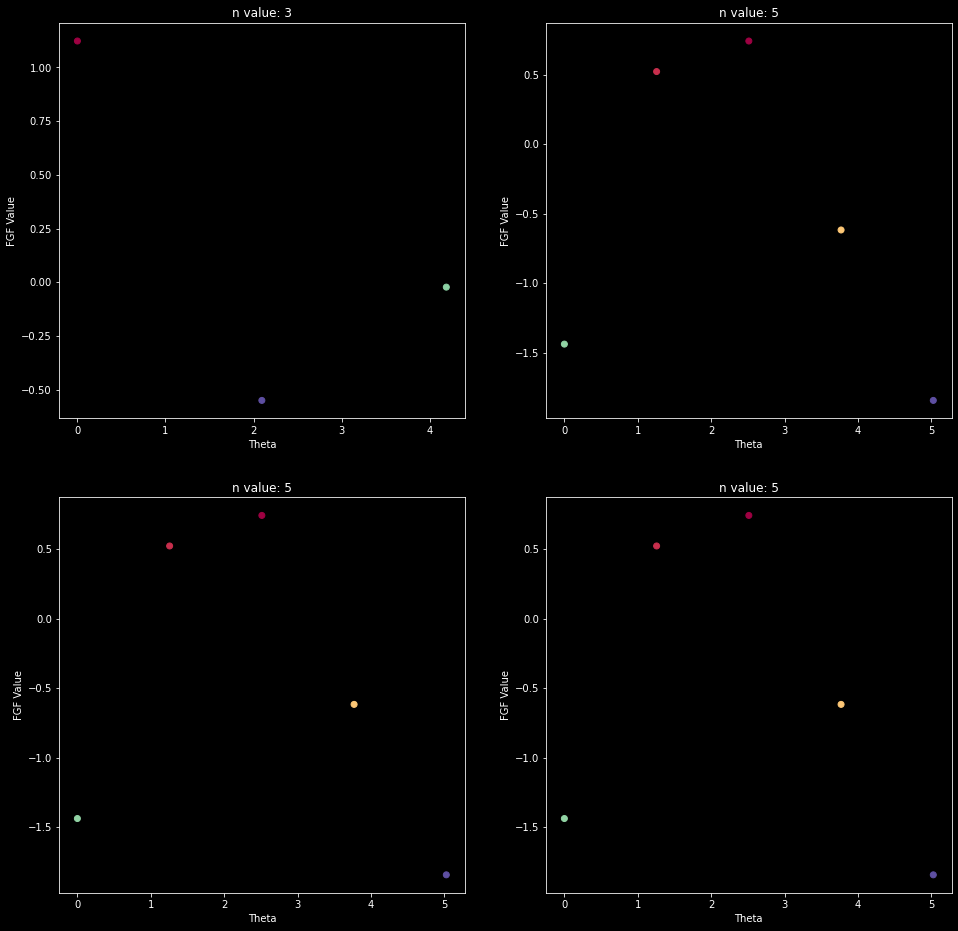

In [193]:
#Defining the plot configuration
plt.style.use("dark_background")

f = plt.figure(figsize = (16,16))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

#Instructions to plot q1
ax1.scatter(x=theta1, y=q1, c=colors1, cmap='Spectral')
ax1.set_xlabel('Theta')
ax1.set_ylabel('FGF Value')
ax1.set_title("n value: %s" % quart)

#Instructions to plot q2
ax2.scatter(x=theta2, y=q2, c=colors2, cmap='Spectral')
ax2.set_xlabel('Theta')
ax2.set_ylabel('FGF Value')
ax2.set_title("n value: %s" % half)


#Instructions to plot q3
ax3.scatter(x=theta3, y=q3, c=colors3, cmap='Spectral')
ax3.set_xlabel('Theta')
ax3.set_ylabel('FGF Value')
ax3.set_title("n value: %s" % tquar)


#Instructions to plot q4
ax4.scatter(x=theta4, y=q4, c=colors4, cmap='Spectral')
ax4.set_xlabel('Theta')
ax4.set_ylabel('FGF Value')
ax4.set_title("n value: %s" % maxi)

plt.show()

# Maxima Analysis

In [190]:
#Creates a list of all 'n' values
#Gets the mean maxima for each n value
MaxMean = []
for j in range(len(nvals1)):
    MaxMean.append(data['Info']['n'][nvals1[j]]['meanOfMaxima'])

In [191]:
#Gives equation to try and fit data
def func1(x, a, b):
    return a*(np.log(x)**b)

popt, pcov = curve_fit(func1, nvals, MaxMean)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


### Maxima Graph

For a*ln(n)^b you have a,b values: 
[ 1.24356998 -1.08635788]


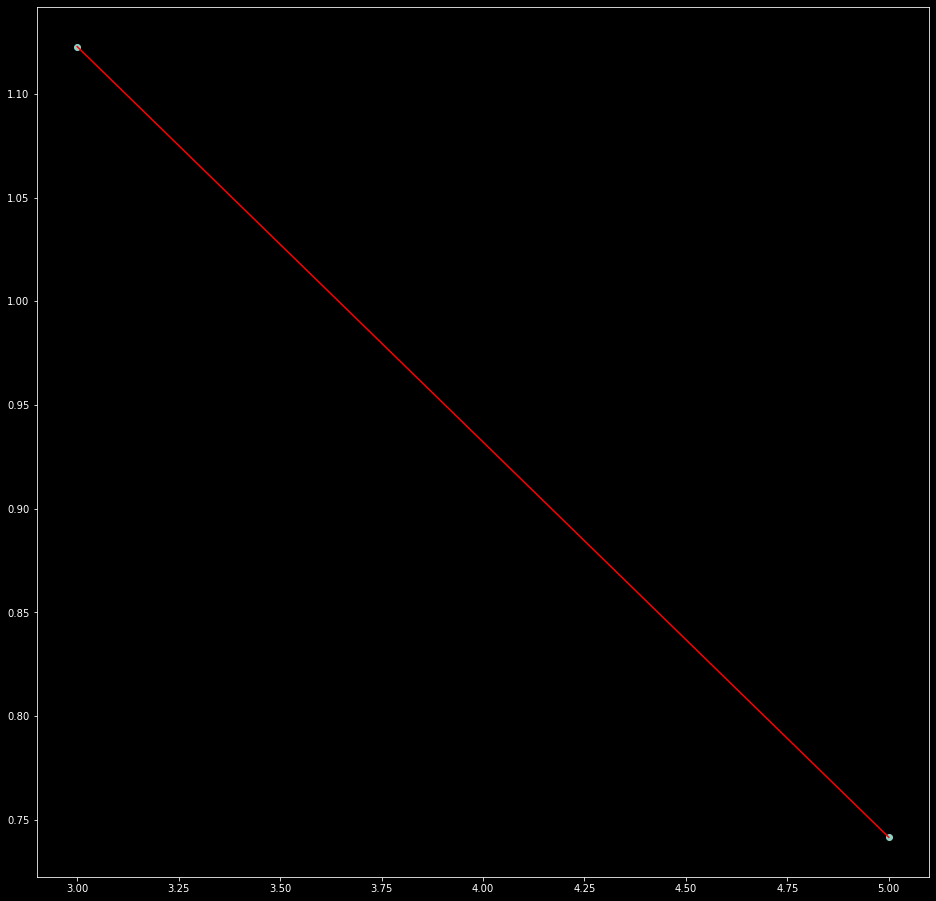

In [192]:
#Defining what the plot size
plt.style.use("dark_background")
f = plt.figure(figsize = (16,16))

#Plot Data and Line of best fit
plt.scatter(x=nvals,y=MaxMean)
plt.plot(nvals, func1(nvals, *popt), c="red", label=popt)


#Gives numbers for line of best fit equation
print("For a*ln(n)^b you have a,b values: ")
print(popt)